<a href="https://colab.research.google.com/github/chandrusuresh/ReinforcementLearning/blob/master/Ch6-TD_Learning/TD_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solution to Exercise 6.1


## Monte-Carlo Error

This is the error in the estimate at each episode when the values are updated at the end of the episode after the reward is known.

The Monte-Carlo Error is given by $G_t - V(S_t)$ which simplifies to:
$$ \begin{align*} G_t - V(S_t) &= R_{t+1} + \gamma G_{t+1} - V(S_t)\\
&= R_{t+1} + \gamma G_{t+1} - V(S_t) + \gamma V(S_{t+1}) -  \gamma V(S_{t+1}) \end{align*}$$

Given, $\delta_t = R_{t+1} + \gamma V(S_{t+1}) - V(S_t)$

$$ \begin{align*} G_t - V(S_t) &= \delta_t + \gamma (G_{t+1} - V(S_{t+1})) \\ 
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 (G_{t+2} - V(S_{t+2})) \\
&= \delta_t + \gamma \delta_{t+1} + \ldots + \gamma^{T-t} (G_T - V(S_T)) \end{align*}$$

Since $G_T = V(S_T)$, we have the final simplified term for MC error as:

$$ G_t - V(S_t) = \sum_{k=t}^{T} \gamma^{k-t} \delta_k $$

## Bootstrap Error
This is the error in the estimate at each episode when the values are updated at each step of the episode before the (final/terminal) reward is known.

The update at time $t$ for a $TD(0)$ update is given as:
$ V_{t}(S_t) = V_{t-1}(S_t) + \alpha (R_{t+1} + \gamma V_{t-1}(S_{t+1}) - V_{t-1}(S_t))$

The Bootstrap Error is given by $G_t - V(S_t)$ which simplifies to:
$$ \begin{align*} G_{t} - V_{t}(S_t) &= R_{t+1} + \gamma G_{t+1} - V_t(S_t)\\
&= R_{t+1} + \gamma G_{t+1} - V_{t-1}(S_t) - \alpha (R_{t+1} + \gamma V_{t-1}(S_{t+1}) - V_{t-1}(S_t)) \\
&= R_{t+1} + \gamma G_{t+1} - V_{t-1}(S_t) - \alpha (R_{t+1} + \gamma V_{t-1}(S_{t+1}) - V_{t-1}(S_t)) + \gamma V_{t-1}(S_{t+1}) -  \gamma V_{t-1}(S_{t+1}) \\
&= (1-\alpha)R_{t+1} - (1-\alpha)V_{t-1}(S_t) + \gamma (G_{t+1} - V_{t-1}(S_{t+1})) + (1-\alpha) \gamma V_{t-1}(S_{t+1})  + \gamma V_{t}(S_{t+1}) -  \gamma V_{t}(S_{t+1})\\
&= (1-\alpha)\delta_t + \gamma (G_{t+1} - V_{t}(S_{t+1})) + \gamma (V_{t}(S_{t+1}) - V_{t-1}(S_{t+1}))\\ 
&= (1-\alpha)\delta_t + \gamma ((1-\alpha)\delta_{t+1} + \gamma (G_{t+2} - V_{t}(S_{t+2})) + \gamma \alpha \delta_{t+2}) + \gamma \alpha \delta_{t+1}\\
&= (1-\alpha) \delta_t + \gamma \delta_{t+1} + \ldots + \gamma^{T-t} (G_T - V(S_T))\\
&= (1-\alpha) \delta_t + \sum_{k=t+1}^{T} \gamma^{k-t} \delta_k \\
&= \sum_{k=t}^{T} \gamma^{k-t} \delta_k - \alpha \delta_t \end{align*}$$


# Solution to Exercice 7.1

## $n$-step TD Bootstrap Error

The above 2 derivations show the expression for the bootstrapping error for MonteCarlo and $1$-step TD methods. The following derivation is a more general derivation for the $n$-step TD Bootstrap error with the $1$-step method ($n=0$) & the Monte-Carlo method ($n=\infty$) in opposite extremes.

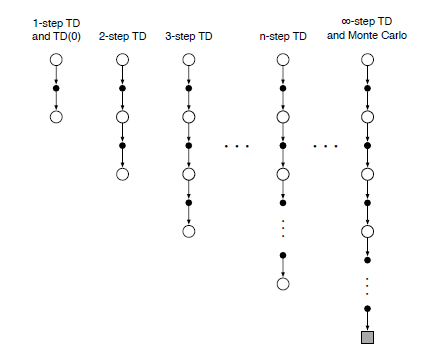


This is the error in the estimate at each episode when the values are updated at each step of the episode before the (final/terminal) reward is known.

The update at time $t$ for an $n$-step update is given by:
$$ V_{t}(S_t) = V_{t-1}(S_t) + \alpha \left(\sum_{k=t+1}^{t+n} R_{k} + \gamma^n V_{t+n-1}(S_{t+n}) - V_{t-1}(S_t) \right)$$



The Bootstrap Error is given by $G_t - V(S_t)$ is given by:
$$ \begin{align} G_t - V_t(S_t) &= R_{t+1} + \gamma G_{t+1} - V_{t-1}(S_t)-\alpha \left (\sum_{k=t+1}^{t+n} \gamma^{k-t-1} R_k + \gamma^n V_{t+n-1}(S_{t+n}) - V_{t-1}(S_t) \right) \\ 
&= (1-\alpha) \left(\sum_{k=t+1}^{t+n} \gamma^{k-t-1} R_k - V_{t-1}(S_t) \right) + \left(\sum_{k=t+n+1}^{T} \gamma^{k-t-1} R_k - \alpha \gamma^n V_{t+n-1}(S_{t+n}) \right) + \gamma^n V_{t+n-1}(S_{t+n}) - \gamma^n V_{t+n-1}(S_{t+n}) \\ 
&= (1-\alpha) \delta_t + \left(\sum_{k=t+n+1}^{T} \gamma^{k-t-1} R_k - \gamma^n V_{t+n-1}(S_{t+n}) \right) + \gamma^n V_{t+n}(S_{t+n}) - \gamma^n V_{t+n}(S_{t+n})\\ 
&= (1-\alpha) \delta_t + \left(\sum_{k=t+n+1}^{T} \gamma^{k-t-1} R_k - \gamma^n V_{t+n}(S_{t+n})\right) + \alpha \gamma^n \delta_{t+n} \\ 
&= (1-\alpha) \delta_t + \gamma^n (G_{t+n} - V_{t+n}(S_{t+n})) + \alpha \gamma^n \delta_{t+n} \\
&= (1-\alpha) \delta_t + \gamma^n  \left( (1-\alpha) \delta_{t+n} + \gamma^n (G_{t+2n} - V_{t+2n}(S_{t+2n}) + \alpha \gamma^n \delta_{t+2n}) \right) + \alpha \gamma^n \delta_{t+n} \\ 
&= (1-\alpha) \delta_t + \gamma^n \delta_{t+n} + \gamma^{2n} \left( (1-\alpha) \delta_{t+2n} + \gamma^n (G_{t+3n} - V_{t+3n}(S_{t+3n}) + \alpha \gamma^n \delta_{t+3n}) \right) + \alpha \gamma^{2n} \delta_{t+2n} \\
&= (1-\alpha) \delta_t + \sum_{k=1}^{T-n} \gamma^{kn} \delta_{t+kn}  \end{align}$$

# Solution to Exercice 7.4


Novel TD-Error with $n$-step SARSA

The $n$-step returns with SARSA is given by,
$$ \begin{align*} G_{t:t+n} &= R_{t+1} + \gamma R_{t+2} + \ldots + \gamma^{n-1} R_{t+n} + \gamma^n Q_{t+n-1}(S_{t+n},A_{t+n}) \\
&= R_{t+1} + \gamma R_{t+2} + \ldots + \gamma^{n-1} R_{t+n} + Q_{t-1}(S_t,A_t) + \sum_{1}^{n}\gamma^{k-1} (\gamma Q_{t+k-1}(S_{t+k},A_{t+k}) - Q_{t+k-2}(S_{t+k-1},A_{t+k-1}))  \\ 
&= Q_{t-1}(S_t,A_t) + \sum_{k=t}^{t+n-1} \gamma^{k-t} (R_k + \gamma Q_{k}(S_{k+1},A_{k+1})-Q_{k-1}(S_k,A_k))\end{align*} $$